In [3]:
import django, sys, os
sys.path.append('/home/max/software/django-tmv/tmv_mcc-apsis/BasicBrowser')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import product, combinations
from utils.text import *
from pycountry_convert import  country_alpha2_to_continent_code, country_alpha3_to_country_alpha2

import pandas as pd

In [4]:
p = Project.objects.get(pk=178)
docs = Doc.objects.filter(query=6956, content__iregex="\w").order_by('id')

## WHY IS OLIVEIRA, 2007 included?
### Also, Nepstad and Stickler, 2008
### Polidoro 2010, very weak - not main conclusion

# Exclude non-climate docs
docs = docs.exclude(pk__in=[
    
    # ENSO
    1461495, # Espinoza 2013
    1626875, # White, 2007
    
    1622783, # Why is Oliveira, 2007 included?
    1627593, # Killeen 2008
    1627701, # Also, Nepstad and Stickler, 2008
    2093363, # Etter
    2090005, # Nepstad, 2006
    1627734, # Polidoro 2010
    
    2089982, # Mars, 2007
    
    2090013, # Randolph 2010
    
    2093360, # Petney 2012
    
    2089960, # Wassenaar, 2007 - LUC
    1627733, # Polidoro 2010, very weak - not main conclusion
    2090004, # Veran 2007 - long line fishing
    2089967, # Giri - mangrove database, climate only mentioned in conclusion and with reference
    2089944, # Jellyman - eels
    2091676, # Novelo-Casanova, 2010: Cayman Islands climate??
    2089959, # Bruno, 2007 
    1514856, # de Waroux 2012
    2091680, # Guzman, 2008, we consider the main anthropogenic threats to the coral reefs and communities of the islands are overfishing, sedimentation and tourism
    2089950, # Razumov - permafrost and erosion - climate? is the ref there as counter-evidence Nevertheless, the longterm average annual rate
#                             of erosion of the coast line of the bottom of the Arctic
#                             Seas is much lower than in the seas outside the cry
#                             olithozone even under the conditions of the climate’s
#                             warming accompanied by the activation of thermo
#                             abrasion and during the subaqual abrasion processes
#                             (Fig. 5). In particular, this proves the development of
#                             ordinary abrasionaccumulation processes in the Arc
#                             tic Seas, and, here, we cannot say about the influence
#                             of thermal slumps on the formation of the underwater
#                             slope relief
])

#


docs.count()

257

In [1]:
from mordecai import Geoparser
geo = Geoparser()

geo.geoparse("I took the tube from Oxford Circus to London Bridge, via Bank")

Using TensorFlow backend.
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ma





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


GET http://localhost:9200/geonames/_count [status:N/A request:0.001s]
Traceback (most recent call last):
  File "/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/urllib3/connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 83, in create_connection
    raise err
  File "/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/elasticsearch/connection/http_urllib3.py", line 114, in perform_request
    response = self.pool.urlopen(method, url, body, retries=False, headers=self.headers, **kw)
  File "/home/

IndexError: tuple index out of range

In [2]:

for d in docs:
    continent = "None"
    cat = d.category.first().name
    gp = geo.geoparse(d.content + " ")
    for p in gp:
        p["cat"] = cat
        if "geo" in p:
            try:
                a2 = country_alpha3_to_country_alpha2(p["geo"]["country_code3"])
                continent = country_alpha2_to_continent_code(a2)
            except:
                pass
        places.append(p)
        
    ccs.append({
        "continent": continent,
        "category": cat
    })



NameError: name 'Tag' is not defined

In [6]:
len(places)

844

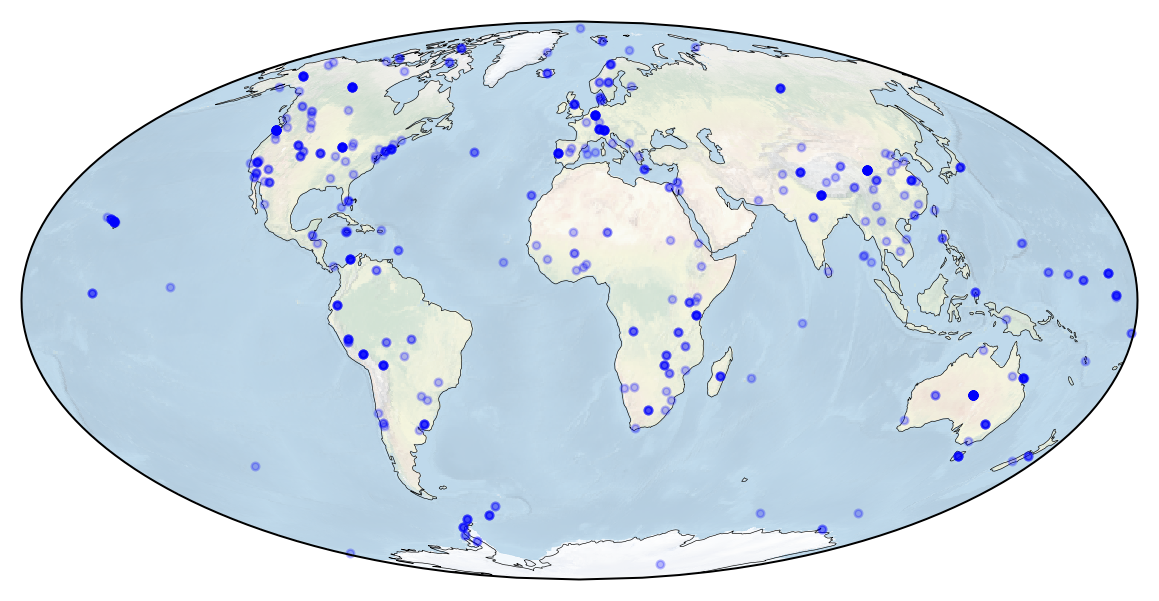

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8), dpi=180)

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines(lw=0.25)
ax.stock_img(alpha=0.5)
#ax.borders(lw=0.25)

lat, lon, pl = zip(*[(p["geo"]["lat"], p["geo"]["lon"], p["word"]) for p in places if "geo" in p])

ax.plot(
    lon, lat,
    'b.',
    #s=25,
    alpha=0.25,
    transform=ccrs.PlateCarree(),
)

ax.set_global()

plt.show()

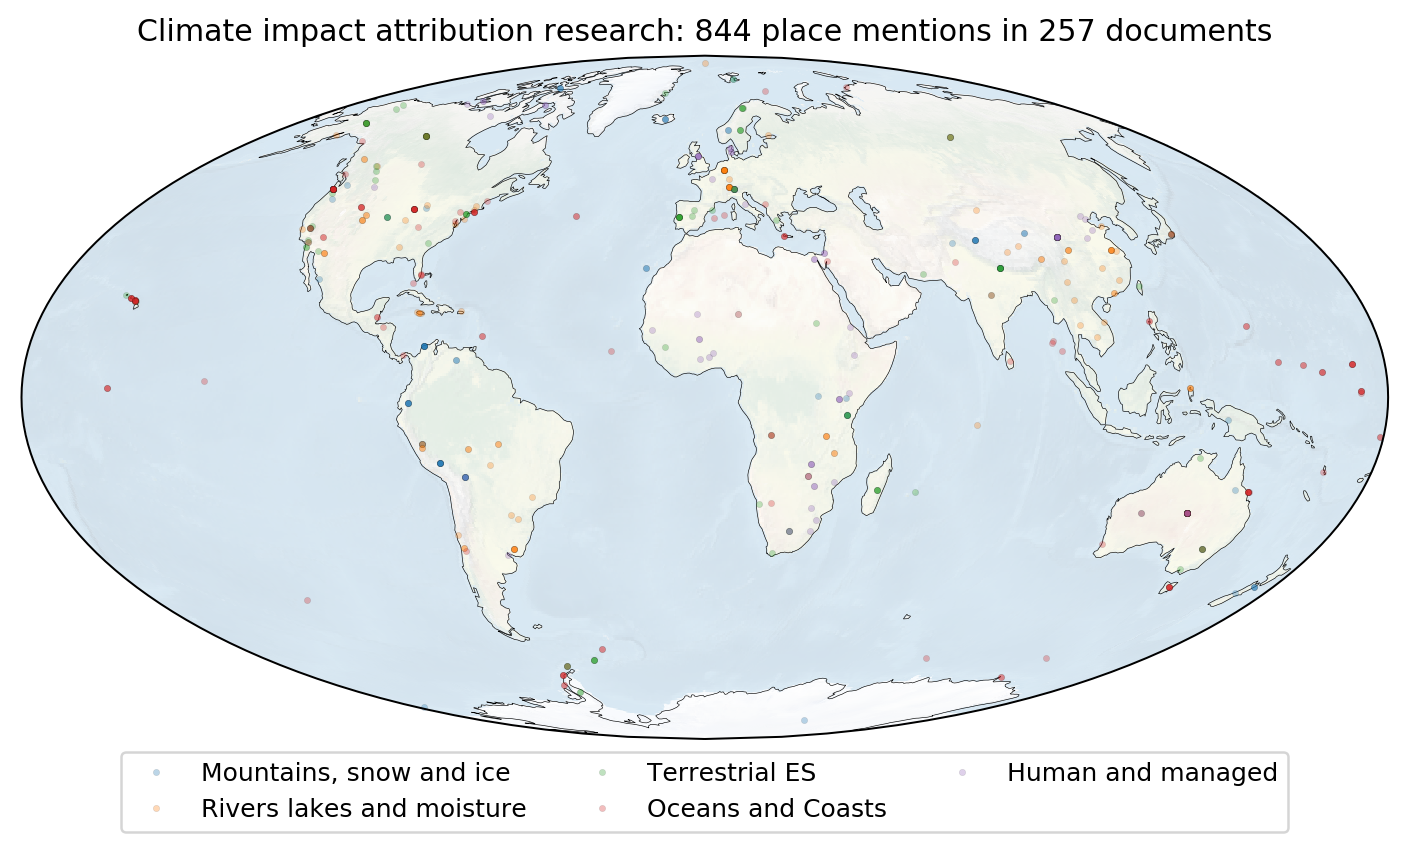

In [11]:

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6), dpi=180)

ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines(lw=0.25)
ax.stock_img(alpha=0.3)
#ax.borders(lw=0.25)



for c in cats.values_list('name',flat=True):
    try:
        lat, lon, pl = zip(
            *[(
                p["geo"]["lat"], 
                p["geo"]["lon"], 
                p["word"],
            ) for p in places if "geo" in p and p["cat"]==c]
        )
    except:
        continue

    ax.plot(
        lon, lat,
        ".",
        #s=25,
        markersize=5,
        markeredgecolor="black",
        markeredgewidth=0.1,
        alpha=0.3,
        transform=ccrs.PlateCarree(),
        label=c
    )
    

ax.set_global()

ax.legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5,0))

ax.set_title(f"Climate impact attribution research: {len(places)} place mentions in {ndocs} documents")

fig.tight_layout()

plt.savefig("../plots/original_map.png", bbox_inches="tight")

plt.show()

In [19]:
cc_df = pd.DataFrame.from_dict(ccs)
cc_df.head()

,category,continent
0,Terrestrial ES,NA
1,Oceans and Coasts,AS
2,Oceans and Coasts,OC
3,Rivers lakes and moisture,None
4,Terrestrial ES,EU


In [20]:
cc_counts = cc_df.groupby(['category','continent']).size().reset_index()
cc_counts = cc_counts.pivot(index="category",columns="continent",values=0)

cc_counts

continent,AF,AS,EU,NA,None,OC,SA
category,,,,,,,
Human and managed,7.0,6.0,5.0,3.0,11.0,2.0,1.0
"Mountains, snow and ice",3.0,4.0,6.0,7.0,8.0,4.0,4.0
Oceans and Coasts,3.0,6.0,3.0,20.0,29.0,16.0,1.0
Rivers lakes and moisture,3.0,7.0,4.0,9.0,14.0,2.0,7.0
Terrestrial ES,7.0,4.0,10.0,18.0,19.0,4.0,NaN


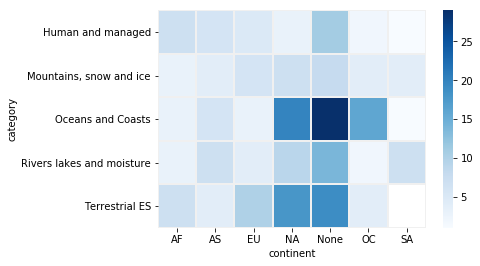

In [21]:
import seaborn as sns
sns.heatmap(
    cc_counts,
    cmap="Blues",
    linecolor="#F0F0F0",
    linewidths=1
)

fig.tight_layout()
plt.savefig("../plots/original_category_continent.png", bbox_inches="tight")